# 지도 학습 분류 미리보기

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
# 한글폰트 사용을 위한 설정
import matplotlib.font_manager as fm 
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()     # 가지고 온 경로의 
matplotlib.rc('font', family = font)

### 생선 이진분류 : 도미(bream) or 빙어(smelt)
- 이진분류는 0, 1로 구분
- 도미야? (1) / 도미가 아니야? (0) 형태 반환

In [153]:
# 도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
len(bream_length), len(bream_weight)    # 결측, 누락 없음. 

(35, 35)

In [154]:
# 빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
len(smelt_length), len(smelt_weight)    # 결측, 누락 없음

(14, 14)

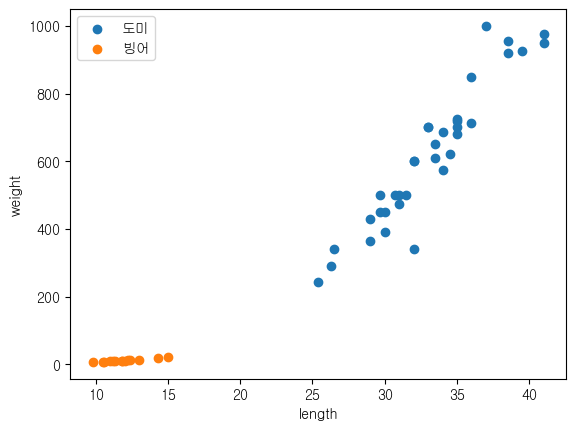

In [114]:
# 데이터 분포 확인 (산점도)
plt.scatter(bream_length, bream_weight, label='도미')
plt.scatter(smelt_length, smelt_weight, label='빙어')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

### 데이터 전처리 
- 모델이 원하는 형태로 데이터 가공
    - 입력(특성) : [길이, 무게] 2차원 배열 
    - 결과(정답) : 도미 or 빙어 -> 1, 0으로 구성된 1차원 배열 

(분류라는 지도학습 실시 예정)

In [155]:
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight
# len(fish_length), len(fish_weight)

# 훈련 입력 데이터 준비 
train_input = []
for l, w in zip(fish_length, fish_weight) :       # 같은 인덱스를 가진 것들을 하나씩 담아줌(배열 형태로)
    train_input.append([l, w])
# train_input


# 훈련 정답 데이터 준비
train_label = [1] * len(bream_length) + [0] * len(smelt_length)    # : 도미일 때 1, 빙어일 때 0 반환
# train_label 

### K-최근접 이웃 분류 모델 (K-Nearest Neighbots, KNN)

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
kn = KNeighborsClassifier()   #모델 객체를 만듦

# fit(훈련 / 학습) - score(평가) - predict(예측)
kn.fit(train_input, train_label)    # 입력 데이터, 정답 데이터 
kn.score(train_input, train_label)  # 1.0 == 100% (백점 의미)
kn.predict([[30, 500], [10, 5]])     # [1, 0] : [30, 500]은 도미, [10, 5]는 빙어

array([1, 0])

In [118]:
# 최근접 이웃 모델의 작동 원리
# - 주어진 데이터와 가장 가까운 k개의 이웃을 찾고, 이웃 데이터를 이용해 예측
# - 따라서 최근접 이웃 모델의 훈련은 별도의 *연산 없이* 모델이 데이터를 로드하면 끝남


# kn.kneighbors()
# - distances : 모델 데이터포인트와의 거리 
# - index : 모델 데이터포인트의 인덱스 
distances, index = kn.kneighbors([[30, 500]])   # 학습데이터와 유사하게 값을 반환해야함. 대괄호 두개 
                                                # 해당 값과 가까운 5개의 데이터에 대해 거리, 인덱스 반환
print(distances, index)
print(np.array(train_input)[index])     # fancy indexing 실행을 위해 array로 변경. 값 반환. 
print(np.array(train_label)[index])     # 라벨 값 반환.     # [[1 1 1 1 1]] 다 도미인 것을 알 수 있음. 

[[ 0.3         0.7         1.          1.5        25.01999201]] [[ 6  9 11 12 10]]
[[[ 29.7 500. ]
  [ 30.7 500. ]
  [ 31.  500. ]
  [ 31.5 500. ]
  [ 31.  475. ]]]
[[1 1 1 1 1]]


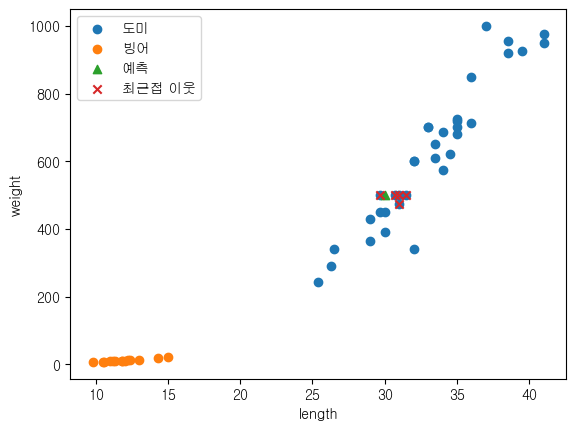

In [119]:
train_input = np.array(train_input)

# 데이터 분포 확인 (산점도)
plt.scatter(bream_length, bream_weight, label='도미')
plt.scatter(smelt_length, smelt_weight, label='빙어')
plt.scatter(30, 500, label='예측', marker='^')
plt.scatter(train_input[index, 0], train_input[index, 1], label='최근접 이웃', marker='x')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [152]:
kn49 = KNeighborsClassifier(n_neighbors=49)   # k 개수를 변경하는 방법

kn49.fit(train_input, train_label)
kn49.score(train_input, train_label)    # 0.714  : 전체의 수에서 도미가 압도적으로 많기 때문에 49개로 설정을 하면, 너무 넓은 범주로 잡았기 떄문에 빙어의 값 또한 도미로 착각해 정확성이 떨어짐
# k데이터 산출이 중요함. 

0.7142857142857143

In [121]:
35/49

0.7142857142857143

### 훈련 데이터 - 테스트(평가) 데이터 분리

In [160]:
fish_input = []   # 초기화
for l, w in zip(fish_length, fish_weight) : 
    fish_input.append([l, w])

fish_label = [1] * len(bream_length) + [0] * len(smelt_length)


In [161]:
# sampling 편향 : 데이터가 한쪽으로 치우친 현상
# train 데이터는 전부 다 도미, test 데이터는 전부 다 빙어 
# 이진 분석 간 한 쪽 데이터가 과하게 많을 때, 발생. 균등한 데이터 수집이 중요. 
train_input = fish_input[:35]
train_label = fish_label[:35]   # 1

test_input = fish_input[35:]
test_label = fish_label[35:]    # 0

# train_label, test_label

kn = KNeighborsClassifier()
kn.fit(train_input, train_label)
kn.score(test_input, test_label)   # 0점

0.0

In [162]:
from sklearn.model_selection import train_test_split

# 아래 순서대로 반환
train_input, test_input, train_label, test_label = \
train_test_split(fish_input, fish_label, test_size=0.3, stratify=fish_label, random_state=42)   # 함수 (X값, y값, 테스트 사이즈(30% test데이터로 사용), random_state : 난수 고정)

print(len(train_label), len(test_label))  # 49개의 30% = 15
print(sum(train_label), sum(test_label))  # 24 + 11 = 35 : 1로 반환한 도미 데이터 수와 동일 -> 비율이 잘 나눠서 들어감

34 15
24 11


In [125]:
# from sklearn.model_selection import train_test_split

# train_input, test_input, train_label, test_label = \
# train_test_split(fish_input, fish_label, test_size=0.3, stratify=fish_label, random_state=42)  
# # test_size: 30% 평가, 70% 학습
# # random_state=42 일반적
# # 파이썬에서 개행에서 줄을 바꾸고 싶을 때 '\' 를 기재하면 됨

# print(len(train_label), len(test_label)) # 49개의 30% = 15
# print(sum(train_label), len(test_label))

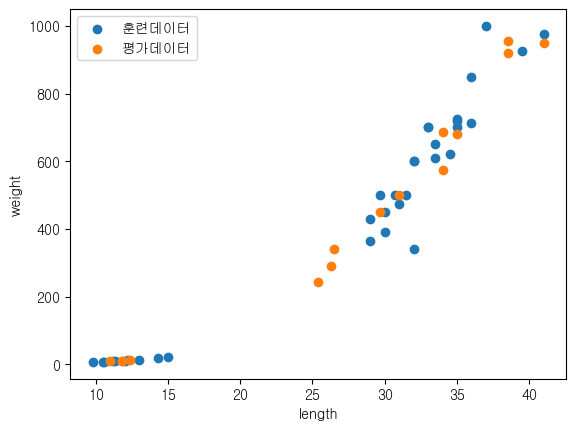

In [163]:
train_input = np.array(train_input)
test_input = np.array(test_input)

# 데이터 분포 확인 (산점도)
plt.scatter(train_input[:, 0], train_input[:, 1], label='훈련데이터')   # 코드확인하기 
plt.scatter(test_input[:, 0], test_input[:, 1], label='평가데이터')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()     # 결과가 이상해 ;;

In [143]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

1.0

### 정규화
- 데이터포인트의 값의 범위를 재정의하는 것 
    - StandardScaler
    - MinMaxScaler

In [128]:
predict_input = [25, 150]
kn.predict([predict_input])   # array([0]) : 빙어닷! 왜??

array([0])

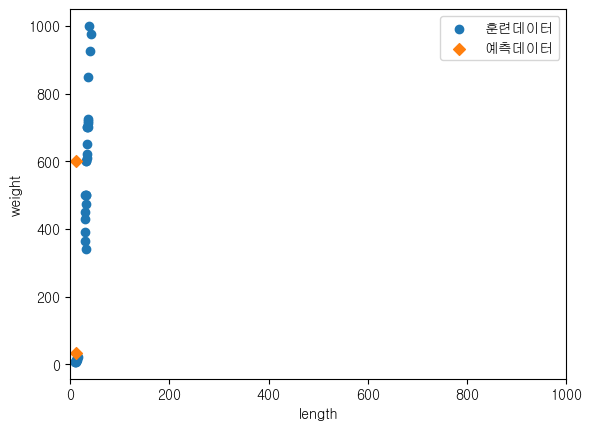

In [ ]:
# 데이터 분포 확인 (산점도)
plt.scatter(train_input[:, 0], train_input[:, 1], label='훈련데이터')
# plt.scatter(test_input[:, 0], test_input[:, 1], label='평가데이터')
plt.scatter(train_input[0], train_input[1], label='예측데이터', marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim((0, 1000))
plt.legend()
plt.show()        # 강의 영상 다시 보기 

In [130]:
distances, index = kn.kneighbors([predict_input])
np.array(train_label)[index]

array([[0, 0, 0, 0, 0]])

##### 표준 점수 (Z-Score)
- 평균에서 얼마나 떠어져 있는지를 표준편차 단위로 계산한 값
$$
    표준점수 = \frac{데이터포인트 - 평균}{표쥰편차}
$$

In [169]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

mean, std

(array([ 27.02352941, 445.60294118]), array([ 10.0816099 , 319.21122132]))

In [170]:
train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

train_scaled, test_scaled

(array([[-1.4703534 , -1.35773091],
        [ 0.49361864,  0.48368306],
        [ 0.74159491,  0.54633749],
        [ 0.36467098,  0.17041086],
        [ 0.49361864,  0.48368306],
        [ 0.79119016,  0.85960969],
        [-1.55962486, -1.36869543],
        [ 0.89038067,  0.84081336],
        [ 0.19604712, -0.04887968],
        [-1.56954391, -1.36524944],
        [ 0.26548048,  0.17041086],
        [-1.4901915 , -1.36524944],
        [ 0.39442813,  0.09209281],
        [ 0.98957118,  1.73677184],
        [ 0.19604712, -0.25877205],
        [ 0.59280915,  0.79695525],
        [-1.26205334, -1.33423549],
        [ 0.44402339,  0.17041086],
        [ 1.23754745,  1.50181769],
        [-1.70841062, -1.37496088],
        [ 0.89038067,  1.26686354],
        [-1.63897726, -1.3724547 ],
        [ 0.6424044 ,  0.51501027],
        [-1.62905821, -1.37402106],
        [ 0.79119016,  0.79695525],
        [ 0.79119016,  0.8752733 ],
        [-1.391001  , -1.35773091],
        [ 0.29523763,  0.013

In [171]:
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_label)
kn.score(test_scaled, test_label)

1.0

In [172]:
predict_scaled = (predict_input - mean) /std
kn.predict([predict_scaled])

array([1])

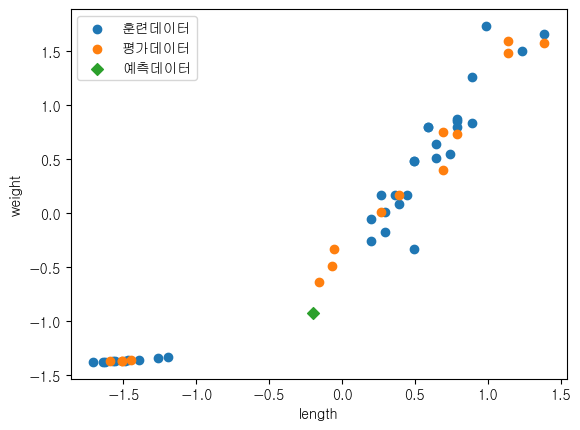

In [173]:
# 데이터 분포 확인 (산점도)
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='훈련데이터')
plt.scatter(test_scaled[:, 0], test_scaled[:, 1], label='평가데이터')
plt.scatter(predict_scaled[0], predict_scaled[1], label='예측데이터', marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show() 

In [ ]:
# StandardScaler
# fit(계산) - transform(변환)
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
train_scaled_by_scaler = std_scaler.fit_transform(train_input)

# train_scaled_by_scaler

array([[-1.4703534 , -1.35773091],
       [ 0.49361864,  0.48368306],
       [ 0.74159491,  0.54633749],
       [ 0.36467098,  0.17041086],
       [ 0.49361864,  0.48368306],
       [ 0.79119016,  0.85960969],
       [-1.55962486, -1.36869543],
       [ 0.89038067,  0.84081336],
       [ 0.19604712, -0.04887968],
       [-1.56954391, -1.36524944],
       [ 0.26548048,  0.17041086],
       [-1.4901915 , -1.36524944],
       [ 0.39442813,  0.09209281],
       [ 0.98957118,  1.73677184],
       [ 0.19604712, -0.25877205],
       [ 0.59280915,  0.79695525],
       [-1.26205334, -1.33423549],
       [ 0.44402339,  0.17041086],
       [ 1.23754745,  1.50181769],
       [-1.70841062, -1.37496088],
       [ 0.89038067,  1.26686354],
       [-1.63897726, -1.3724547 ],
       [ 0.6424044 ,  0.51501027],
       [-1.62905821, -1.37402106],
       [ 0.79119016,  0.79695525],
       [ 0.79119016,  0.8752733 ],
       [-1.391001  , -1.35773091],
       [ 0.29523763,  0.01377476],
       [ 0.59280915,

In [175]:
for i in range(len(train_input)) : 
    print(train_scaled[i] == train_scaled_by_scaler[i])

[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]


### 이진분류 정리

In [ ]:
# 머신러닝 파이프라인에 따라 위에서 진행해 본 이진분류를 하나의 코드 셀에 정리해 봅시다 *^^*

In [ ]:
# 도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
len(bream_length), len(bream_weight)    # 결측, 누락 없음. 

# 빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
len(smelt_length), len(smelt_weight)    # 결측, 누락 없음

# 데이터 분포 확인 (산점도)
# plt.scatter(bream_length, bream_weight, label='도미')
# plt.scatter(smelt_length, smelt_weight, label='빙어')
# plt.xlabel('length')
# plt.ylabel('weight')
# plt.legend()
# plt.show()


# 테스트 데이터 나누기
from sklearn.model_selection import train_test_split

# 아래 순서대로 반환
train_input, test_input, train_label, test_label = \
train_test_split(fish_input, fish_label, test_size=0.3, stratify=fish_label, random_state=42)   # 함수 (X값, y값, 테스트 사이즈(30% test데이터로 사용), random_state : 난수 고정)
# print(len(train_label), len(test_label))  # 49개의 30% = 15
# print(sum(train_label), sum(test_label))  # 24 + 11 = 35 : 1로 반환한 도미 데이터 수와 동일 -> 비율이 잘 나눠서 들어감  


# 정규화
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

# 훈련 / 검증
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_label)
kn.score(test_scaled, test_label)

# 검증 데이터 입력
predict_scaled = []
predict_input = [25, 150]
predict_scaled = (predict_input - mean) /std
kn.predict([predict_scaled])

# 데이터 분포 확인 (산점도)
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='훈련데이터')
plt.scatter(test_scaled[:, 0], test_scaled[:, 1], label='평가데이터')
plt.scatter(predict_scaled[0], predict_scaled[1], label='예측데이터', marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show() 



ValueError: operands could not be broadcast together with shapes (2,) (5,) 

---

# 생선 다중분류

In [181]:
df = pd.read_csv('./data/fish.csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [184]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [186]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
df.describe()    # weight min 값이 0 ??

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [198]:
df[df['Weight']==0]
idx = df[df['Weight']==0].index

df = df.drop(idx).reset_index(drop=True)
df.describe()


,Weight,Length,Diagonal,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.731707,11.627605,4.295191,1.689010
min,5.900000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,63.400000,68.000000,18.957000,8.142000


##### 데이터 전처리 
- 훈련 데이터의 규격 : input + label 인 상태 → X, y 데이터 분리 
- 훈련 데이터 / 평가 데이터 분리 
- 정규화 (컬럼값 사이의 차이를 완화)

In [203]:
# 입력 - 정답 데이터 분리
fish_input = df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()   # ndarray 형태로 반환하기 위해 to_numpy 붙이기 
fish_label = df['Species'].to_numpy()

fish_input.shape, fish_label.shape

((158, 5), (158,))

In [ ]:
# 훈련 - 평가 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(fish_input, fish_label, test_size=.10, random_state=0)   # testsize는 0~1 사이의 값부여 (%로 생각하면됨, )
 
train_input.shape, test_input.shape, train_label.shape, test_label.shape

((142, 5), (16, 5), (142,), (16,))

In [205]:
# 정규화
standard_scaler = StandardScaler()
standard_scaler.fit(train_input)                                 # 훈련 데이터 기준 평균 / 표준편차 작업 
train_scaled = standard_scaler.transform(train_input)            # 훈련 데이터 정규화 완료 결과 반환
test_scaled = standard_scaler.transform(test_input)              # 평가 데이터 정규화 완료 결과 반환

##### 훈련

In [206]:
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(train_scaled, train_label)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
# 모델 내부에 저장된 훈련데이터를 나타내는 속성  (잘 안씀)
kn._fit_X     

array([[-2.36306956e-01,  6.76343006e-01,  7.08519057e-01,
        -6.71430898e-01,  2.30468738e-02],
       [-5.88599673e-01, -2.83008776e-01, -3.74726203e-01,
        -5.56040991e-01, -3.95072820e-01],
       [ 3.43340885e+00,  3.07472246e+00,  2.92785081e+00,
         1.68844327e-01,  1.07273073e+00],
       [-2.18692320e-01,  4.79675891e-03,  3.96929443e-03,
        -1.96877826e-02,  2.00340601e-01],
       [-7.06030578e-01, -5.22846721e-01, -5.06829283e-01,
        -5.30696954e-01, -6.08934870e-01],
       [ 1.74533958e+00,  1.25195407e+00,  1.33380697e+00,
         2.24118377e+00,  1.43262745e+00],
       [ 1.81873389e+00,  1.15601890e+00,  1.12244204e+00,
         8.00495699e-01,  1.30001508e+00],
       [ 2.04058940e-01,  1.96667115e-01,  3.82664792e-01,
         1.17914249e+00,  2.97100501e-01],
       [-7.94103758e-01, -6.85936524e-01, -6.74159852e-01,
        -6.18380440e-01, -5.66759007e-01],
       [-8.88048482e-01, -8.77806880e-01, -8.41490420e-01,
        -7.54183192e-01

In [ ]:
kn.classes_   # 모델이 학습한 클래스(라벨/레이블)의 목록을 나타내는 속성

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

- 다중분류 작동 방식
    - 다중분류 클래스 값의 크기와 같은 형태로 결과를 도출

In [209]:
# 예측
kn.predict(test_scaled[5:10])

array(['Perch', 'Perch', 'Perch', 'Perch', 'Perch'], dtype=object)

In [210]:
# 정답
test_label[5:10]

array(['Perch', 'Perch', 'Pike', 'Perch', 'Perch'], dtype=object)

In [ ]:
print(kn.classes_)
kn.predict_proba(test_scaled[5:10])       # 해당 값이 print(kn.classes_)의 각 값에 해당할 확률을 array 형태로 반환

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


array([[0.        , 0.        , 0.85714286, 0.        , 0.        ,
        0.        , 0.14285714],
       [0.        , 0.        , 0.71428571, 0.        , 0.        ,
        0.        , 0.28571429],
       [0.        , 0.        , 0.42857143, 0.42857143, 0.        ,
        0.        , 0.14285714],
       [0.        , 0.        , 0.71428571, 0.        , 0.14285714,
        0.        , 0.14285714],
       [0.        , 0.        , 0.71428571, 0.        , 0.28571429,
        0.        , 0.        ]])

In [213]:
distance, index = kn.kneighbors(test_scaled[7:8])
print(distance, index)
print(train_label[index])

[[0.91101148 1.22823945 1.54569749 1.58666383 1.59724465 1.68338757
  1.72850434]] [[115 131  73  50  77  84   6]]
[['Pike' 'Pike' 'Perch' 'Perch' 'Pike' 'Perch' 'Whitefish']]


##### 평가

In [214]:
kn.score(test_scaled, test_label)

0.875